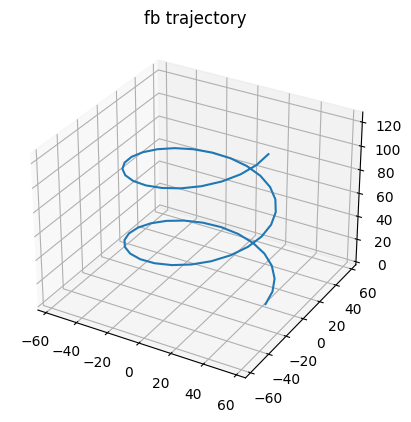

In [1]:
import numpy as np
import matplotlib.pyplot as plt


import fastpli.model.sandbox as sandbox

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

t = np.linspace(0, 4 * np.pi, 50, True)
traj = np.array((42 * np.cos(t), 42 * np.sin(t), 10 * t)).T

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(
    traj[:, 0],
    traj[:, 1],
    traj[:, 2],
)
plt.title("fb trajectory")
set_3d_axes_equal(ax)
plt.show()

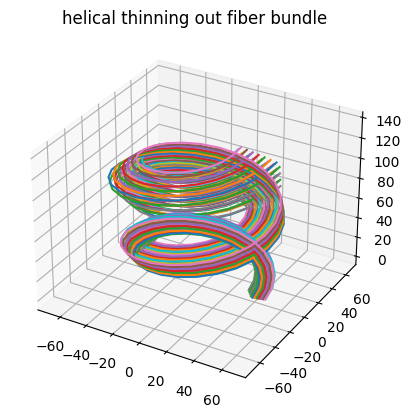

In [2]:
seeds = sandbox.seeds.triangular_grid(width=42,
                                      height=42,
                                      spacing=6,
                                      center=True)
#plt.plot(seeds)
radius = 21
circ_seeds = sandbox.seeds.crop_circle(radius=radius, seeds=seeds)
# plt.plot(circ_seeds)
# populating fiber bundle
fiber_bundle = sandbox.build.bundle(
    traj=traj,
    seeds=seeds,
    radii=np.random.uniform(0.5, 0.8, seeds.shape[0]),
    scale=0.25 + 0.5 * np.linspace(0, 1, traj.shape[0]))

# plotting
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("helical thinning out fiber bundle")
set_3d_axes_equal(ax)
plt.show()

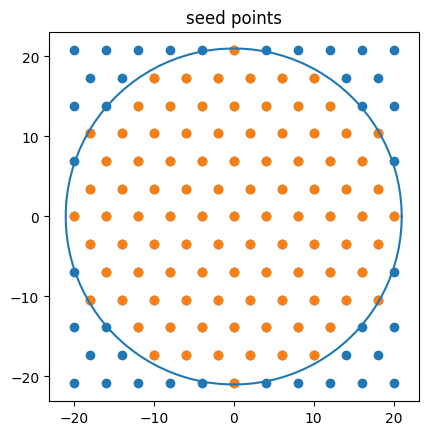

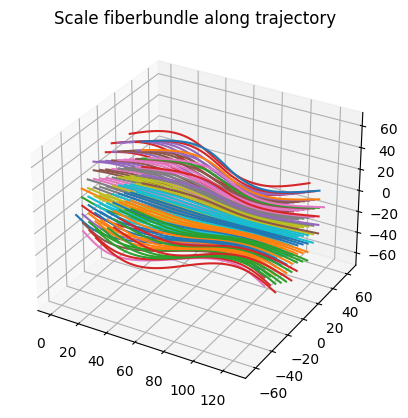

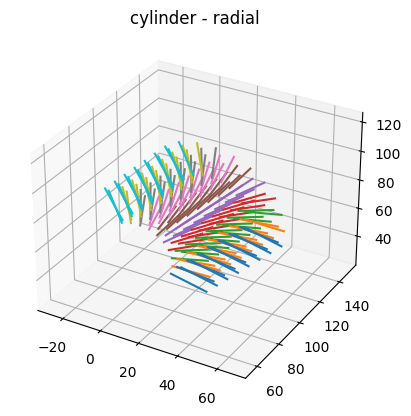

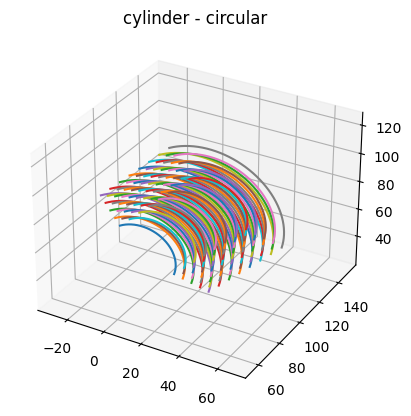

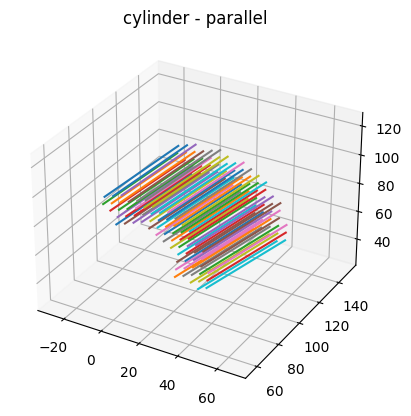

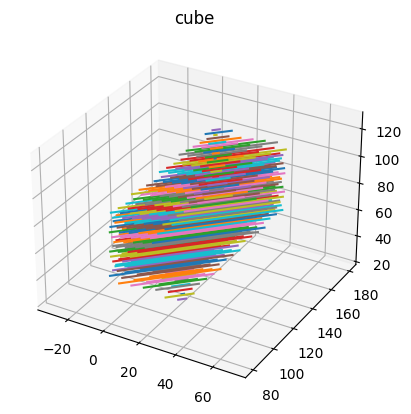

AttributeError: module 'sandbox' has no attribute 'build'

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sandbox



# Build the fiber bundle
fiber_bundle = sandbox.build.bundle(
    traj,
    radius=1.0,
    seeds=seeds,
    fiber_class=sandbox.fibers)

# Plot the fiber bundle
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection='3d')
for fiber in fiber_bundle:
    ax.plot(fiber[:, 0], fiber[:, 1], fiber[:, 2])
plt.title("Curved fiber bundle")
sandbox.utils.set_3d_axes_equal(ax)
plt.show()


we define a Fiber class that has a radius attribute and a create_vertices method to create a set of n_points vertices along the perimeter of the fiber.
We then define two subclasses of Fiber: StraightFiber and CurvedFiber, which have additional attributes to describe their shape.

We fill the straight fiber and curved fiber with smaller fibers with 1/10th of the original radius by creating a set of random vertices around each vertex of the original fiber using NumPy's randn function.
Finally, we visualize the fiber bundle using matplotlib,The big red circle represents the original fiber object, and the small blue circles represent the fiber objects that were created by filling the original fiber object with fibers that have 1/10th of the original radius. Each blue circle represents a single fiber object that was created.

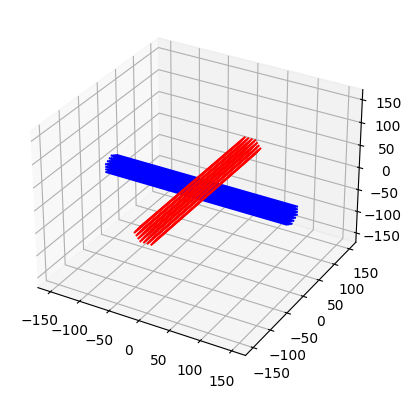

In [4]:
import fastpli.model.solver
import fastpli.model.sandbox
import fastpli.io

import os

def set_3d_axes_equal(ax):
    x_limits = ax.get_xlim3d()
    y_limits = ax.get_ylim3d()
    z_limits = ax.get_zlim3d()

    x_range = abs(x_limits[1] - x_limits[0])
    x_middle = np.mean(x_limits)
    y_range = abs(y_limits[1] - y_limits[0])
    y_middle = np.mean(y_limits)
    z_range = abs(z_limits[1] - z_limits[0])
    z_middle = np.mean(z_limits)

    plot_radius = 0.5 * max([x_range, y_range, z_range])

    ax.set_xlim3d([x_middle - plot_radius, x_middle + plot_radius])
    ax.set_ylim3d([y_middle - plot_radius, y_middle + plot_radius])
    ax.set_zlim3d([z_middle - plot_radius, z_middle + plot_radius])

def plot_fiber_bundles(fbs, colors):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    for fb, c in zip(fbs, colors):
        for f in fb:
            plt.plot(f[:,0],f[:,1],f[:,2], c)
    set_3d_axes_equal(ax)


solver = fastpli.model.solver.Solver()

fiber_bundle_trj_x = [[-150, 0, 0], [150, 0, 0]]
fiber_bundle_trj_y = [[0, -150, 0], [0, 150, 0]]

population = fastpli.model.sandbox.seeds.triangular_circle(20, 6)

fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])
fiber_bundle_x = fastpli.model.sandbox.build.bundle(fiber_bundle_trj_x,
                                                    population, fiber_radii)

fiber_radii = np.random.uniform(2.0, 10.0, population.shape[0])
fiber_bundle_y = fastpli.model.sandbox.build.bundle(fiber_bundle_trj_y,
                                                    population, fiber_radii)

fiber_bundles = [fiber_bundle_x, fiber_bundle_y]

plot_fiber_bundles(fiber_bundles, ['b', 'r'])
plt.show()
    


The first vector fiber_bundle_trj_x starts at [-150, 0, 0] and ends at [150, 0, 0], which means that it goes along the X-axis. The second vector fiber_bundle_trj_y starts at [0, -150, 0] and ends at [0, 150, 0], which means that it goes along the Y-axis. These two vectors are perpendicular to each other, so the resulting fiber bundles will cross at a 90-degree angle

solved: 807, 681/0


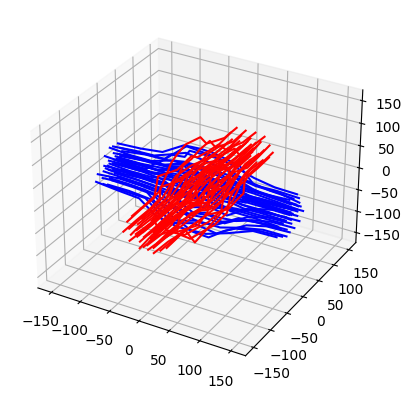

Elapsed time: 1.29 seconds


In [5]:
# run solver
import time

start_time = time.time()






solver.fiber_bundles = fiber_bundles
solver.obj_min_radius = 15
solver.obj_mean_length = 35

N = 1000
for i in range(N):
    solved = solver.step()
    if solved:
        break
    print(f'{i/N*100:.2f}%', end='\r')
print(f'solved: {i}, {solver.num_obj}/{solver.num_col_obj}')

plot_fiber_bundles(solver.fiber_bundles, ['b', 'r'])
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

**What do you observe at the solving process**?


During the solving process, the solver algorithm attempts to find a non-colliding model of the fiber bundles by iteratively adjusting the position and orientation of the individual fibers. This process can take some time, depending on the complexity of the fiber bundles and the solver parameters.

**What do you observe on the solved model?**

Once the solver algorithm has found a non-colliding model, the solved model can be visualized to observe the position and orientation of the individual fibers. The solved model should show the fiber bundles crossing at a 90-degree angle, with the individual fibers in each bundle arranged in a non-overlapping configuration. It is also possible to compute and visualize additional properties of the fiber bundles, such as the average curvature or orientation of the individual fibers.

Change the fiber segment obj_mean_length parameter. : 35---> 3.5
Change the fiber min bending radius obj_min_radius parameter.: 15---> 1.5



solved: 337, 8325/0


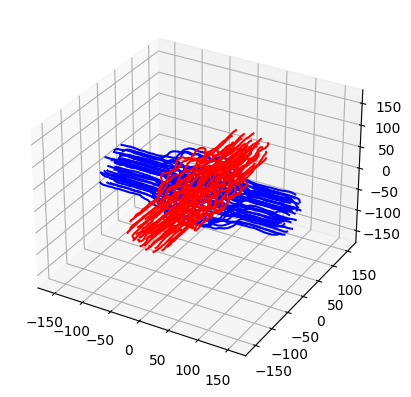

Elapsed time: 13.99 seconds


In [6]:
start_time = time.time()
solver.fiber_bundles = fiber_bundles
solver.obj_min_radius = 1.5
solver.obj_mean_length = 3.5

N = 1000
for i in range(N):
    solved = solver.step()
    if solved:
        break
    print(f'{i/N*100:.2f}%', end='\r')
print(f'solved: {i}, {solver.num_obj}/{solver.num_col_obj}')

plot_fiber_bundles(solver.fiber_bundles, ['b', 'r'])
plt.show()
end_time = time.time()
elapsed_time = end_time - start_time
print("Elapsed time: {:.2f} seconds".format(elapsed_time))

**What do you observe at the solving process?** 10X Computational Time
Changing the fiber segment obj_mean_length parameter will affect the length of the segments used to discretize the fibers. Increasing this parameter will result in longer fiber segments, which may lead to a smoother model. Decreasing this parameter will result in shorter fiber segments, which may lead to a more detailed model with higher curvature(higher computational time).

Changing the fiber minimum bending radius obj_min_radius parameter will affect the degree of curvature allowed in the fibers. Increasing this parameter will limit the curvature of the fibers, resulting in a model with straighter fibers. Decreasing this parameter will allow for more curvature, resulting in a model with more curved fibers.

**How does it affect the result**?
Changes to these parameters may affect the convergence rate of the solver and the final quality of the model. It may also affect the computational time required to solve the model.